# Grad stats 2 problem set 1

## 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [2]:
copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv" ///
agilepredatorsdata20191116.csv

import delimited using "agilepredatorsdata20191116.csv", clear
keep if year==2014 



(52 vars, 205,262 obs)

(197,685 observations deleted)


## 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [17]:
ds, varwidth(29) alpha

all_under                 dist_pell_s               grtotltallgradchrt        idx_gr                    not_pe_po                 pct4yrchrtgrbkaat_w       pe_ind                    poswitcherall             total_enrollment
all_under_w               dist_white_share_w        grtotltchrt2yr            idx_sfa                   online                    pct4yrchrtgrhispt_w       peacqu                    poswitchsystemall         tuitionall_c_w
chain                     fed_grant_pct_w           grtotltchrt4yr            inst_name_new             owner_pe                  pct4yrchrtgrwhitt_w       peswitcherall             selective                 unitid
dist_black_share_w        grad_rate_150_p2yr_w      iclevel                   investevent               pct2yrchrtgrbkaat_w       pctchrtgrbkaat_w          peswitchsystemall         state_n                   year
dist_fed_grant_pct_w      grad_rate_150_p4yr_w      idx_ef                    ipo                       pct2yrchrtgrhispt_w 

## 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [10]:
%help summarize

This front-end cannot display HTML help.

## 4. Use the **"drop"** command with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]
[Explain narrowing choices for your own dataset here, or interpret the meaning of the for-profit college narrowing here]

In [22]:
codebook owner_pe
tab owner_pe, nol m
drop if owner_pe == "State"| owner_pe == "Community" | owner_pe == "Non-profit"
tab owner_pe

tab year, nol m
keep if year == 2014
summ dist_pell_s, d



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
owner_pe                                                                                                                                                                                                                                            (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  string (str15)

         unique values:  4                        missing "":  0/5,561

            tabulation:  Freq.  Value
                         1,920  "Non-profit"
                           552  "

## 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]
[YOUR INTERPRETATION HERE] The histogram is skewed right, its unimodal.  


(bin=35, start=0, width=511.46116)


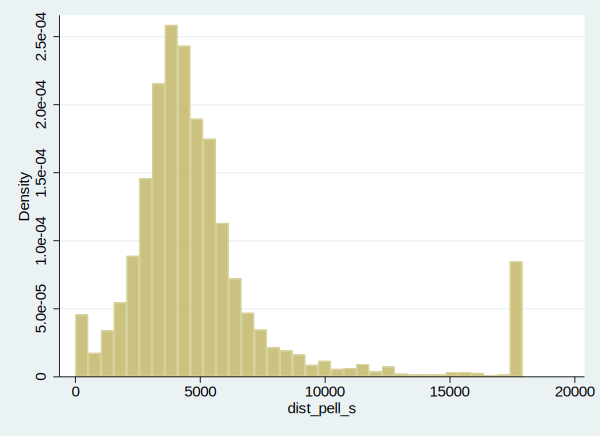

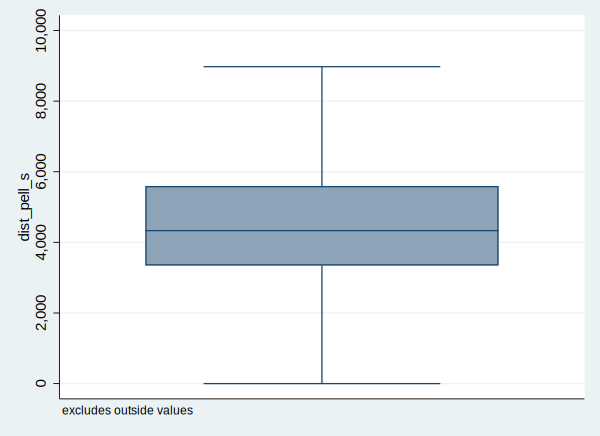

In [24]:
hist dist_pell_s
graph box dist_pell_s, nooutside

## 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]
1. [YOUR HYPOTHESIS HERE] I believe that publicly traded and private equity owned schools will offer more 4-year degrees than lower degrees when compared with privately held colleges, in order to extract more profits, since they can make more money off of 4 year degrees than with lower degrees.
2. [YOUR EXPLANATION OF INDEPENDENT AND DEPENDENT VARIABLES HERE] The independent variable is the status of the for-profit colleges, and the dependent variable is the type of degree offered (4 year or less than a 4 year degree).  The question we are asking is whether the independent variable (for-profit colleges) have an tendency to offer 4 year degrees or lower than 4 year degrees.

## 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [31]:

des iclevel2 owner_pe2
tab iclevel2 owner_pe2, column chi



              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
iclevel2        long    %35.0g     iclevel2   
owner_pe2       long    %15.0g     owner_pe2
                                              


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

                      |            owner_pe2
             iclevel2 | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less t |       216        612        232 |     1,060 
                      |     39.13      28.24      25.16 |     29.11 
----------------------+------------------------

## 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]



              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
iclevel         str35   %35s                  
owner_pe        str15   %15s                  


                            iclevel |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
   At least 2 but less than 4 years |      1,060       29.11       29.11
                 Four or more years |        790       21.70       50.81
Less than 2 years (below associate) |      1,791       49.19      100.00
------------------------------------+-----------------------------------
                              Total |      3,641      100.00


       owner_pe |      Freq.     Percent   

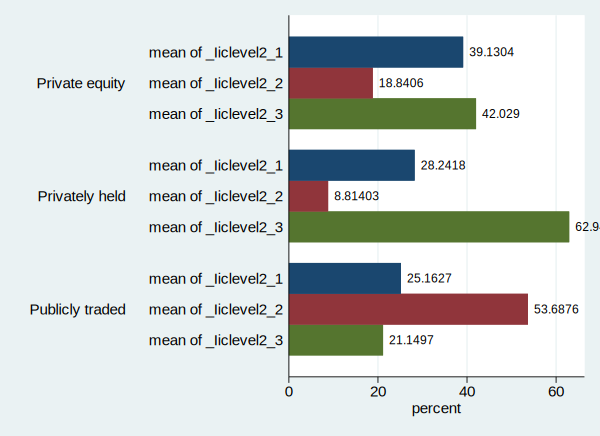






(3641 differences between iclevel2 and level)


        RECODE of |
         iclevel2 |      Freq.     Percent        Cum.
------------------+-----------------------------------
Less than 2 years |      1,791       49.19       49.19
        2-4 years |      1,060       29.11       78.30
  4 or more years |        790       21.70      100.00
------------------+-----------------------------------
            Total |      3,641      100.00


  RECODE of |
   iclevel2 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      1,791       49.19       49.19
          2 |      1,060       29.11       78.30
          3 |        790       21.70      100.00
------------+-----------------------------------
      Total |      3,641      100.00


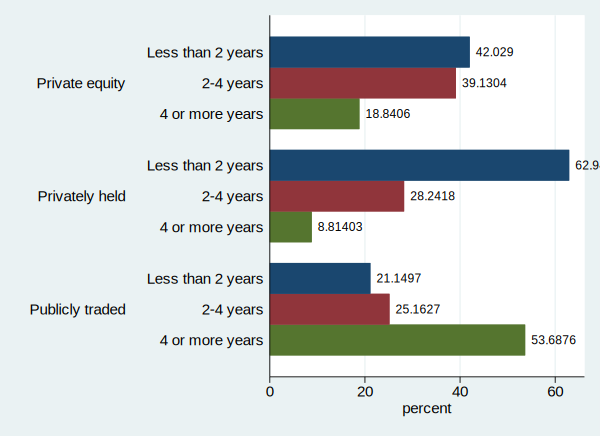

In [41]:
des iclevel owner_pe
  tab iclevel
  tab owner_pe

  des iclevel2 owner_pe2

tab iclevel2 owner_pe2
tab iclevel2 owner_pe2, column chi

xi i.iclevel2, noomit

graph hbar _Iiclevel2_* , over(owner_pe2) label percentages legend(off) blabel(bar) showyvars

recode iclevel2 (1=2 "2-4 years") (2=3 "4 or more years") (3=1 "Less than 2 years"), gen(level)
  tab level
  tab level, nol 
  
xi i.level, noomit

graph hbar _Ilevel_*, over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))


## 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?
[YOUR INTERPRETATION HERE] My hypothesis that private equity and publicly traded colleges would offer more 4+ year degrees than publicly traded colleges was partially wrong.  Only publicly traded colleges offerred more 4 year degrees.  I believe this is due to the increased financialization of higher education.  While 4+ year degrees extract more profit for investors and owners, they also require greater revenue streams, that private equity and privately held colleges do not have, in comparison to publicly traded colleges.  So although each type of college profits from student loan debt, only publicly traded colleges have the finances to offer 4 year degrees or higher.

## 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]
[YOUR INTERPRETATION HERE]

[record your interpretation here] Independently owned colleges offer significantly greater proportion of degrees that are less than two years compared with chain colleges, which offer a relatively even spread of degrees from less than 2 years, 2-4 years, and 4 years or higher.  When comparing chain ownership with ownership form, private equity and publicly traded colleges are independently owned, and privately held universities are more often chain owned.  Since private equity and publicly traded colleges are more profitable than privately held colleges, they may also tend to be more exploitive, which may explain the discrpency in chain ownership.  Since chain ownership is dependent on branding and consumer recognition, they cannot afford to be as exploitive because that will hurt their reputation and deter enrollment.  Therefore the most exploitive ownership forms, private equity and publicly traded, are able to form independent owned colleges and maximize their exploitive practices while simultaneously maximizing profits.



                      |         chain
             iclevel2 |         0          1 |     Total
----------------------+----------------------+----------
At least 2 but less t |       455        605 |     1,060 
   Four or more years |       147        643 |       790 
Less than 2 years (be |     1,152        639 |     1,791 
----------------------+----------------------+----------
                Total |     1,754      1,887 |     3,641 


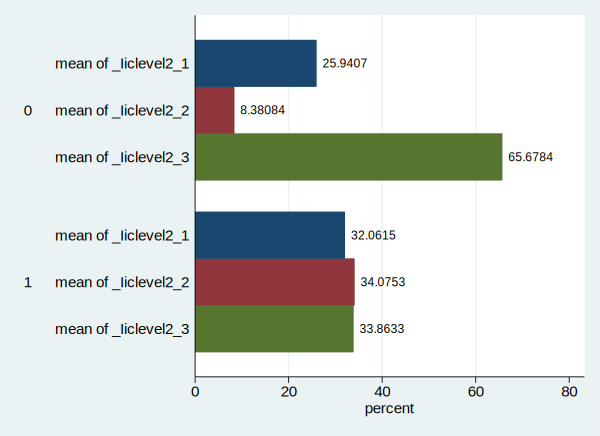

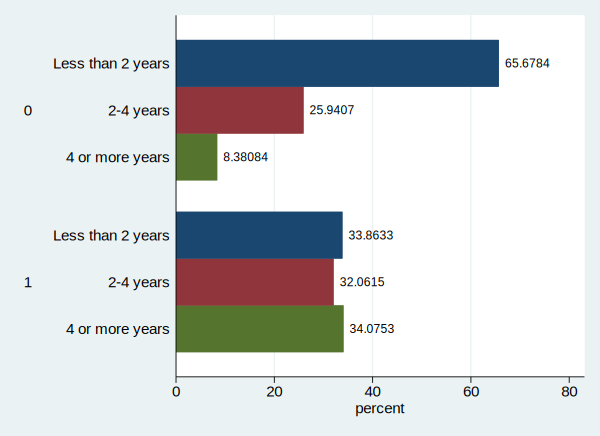











           |            owner_pe2
     chain | Private e  Privately  Publicly  |     Total
-----------+---------------------------------+----------
         0 |        29      1,721          4 |     1,754 
         1 |       523        446        918 |     1,887 
-----------+---------------------------------+----------
     Total |       552      2,167        922 |     3,641 


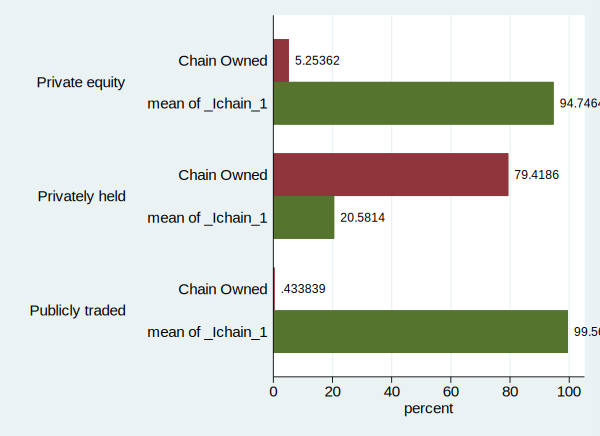

In [62]:
tab iclevel2 chain
xi i.iclevel2, noomit

graph hbar _Iiclevel2_* , over(chain) label percentages legend(off) blabel(bar) showyvars

xi i.level, noomit

graph hbar _Ilevel_*, over(chain) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))

tab chain owner_pe2
xi i.chain, noomit
graph hbar _Ichain_*, over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(0 "Independent Owned" 1"Chain Owned"))

## 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort iclevel:" before the "tab command" and 2) adding a "by(iclevel)" specification to the end of the graph command. Interpret the results [5 pts]
[YOUR INTERPRETATION HERE] When adding type of degree offered, the only variation we find is that, for degrees two years or less private equity colleges and privately held colleges are chain owned.  This may be due to the fact that there is less of a commitment on the part of students for programs that are two years or less.  This means that the exploitive factor mentioned previously, which discourages chain ownership in private equity colleges, may not be relevant for colleges offering two year degrees or less.  However publicly traded colleges that are two year degrees or less are still majority independent owned.  The "exploitive" reasoning may not be sufficient for explaining this, which means more information is needed to determine why private equity colleges have more chain ownership and publicly held do not.



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> iclevel = At least 2 but less than 4 years

           |            owner_pe2
     chain | Private e  Privately  Publicly  |     Total
-----------+---------------------------------+----------
         0 |        11        444          0 |       455 
         1 |       205        168        232 |       605 
-----------+---------------------------------+----------
     Total |       216        612        232 |     1,060 

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> iclevel = Four or more years

           |            ow

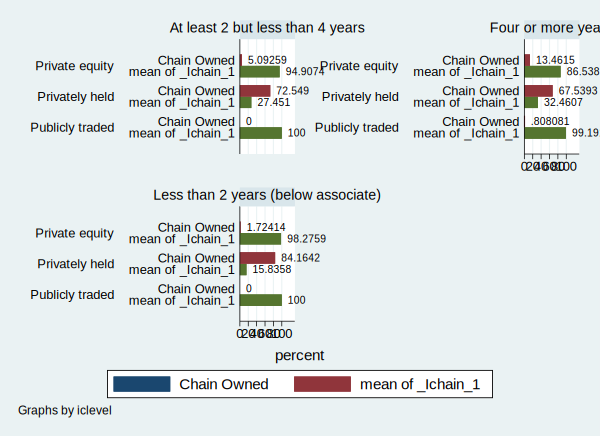

In [67]:
bysort iclevel: tab chain owner_pe2

xi i.chain, noomit
graph hbar _Ichain_*, over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(0 "Independent Owned" 1"Chain Owned")) by(iclevel)